C:\Users\alexe\AppData\Local\Temp\ipykernel_28496\2029880311.py:146: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


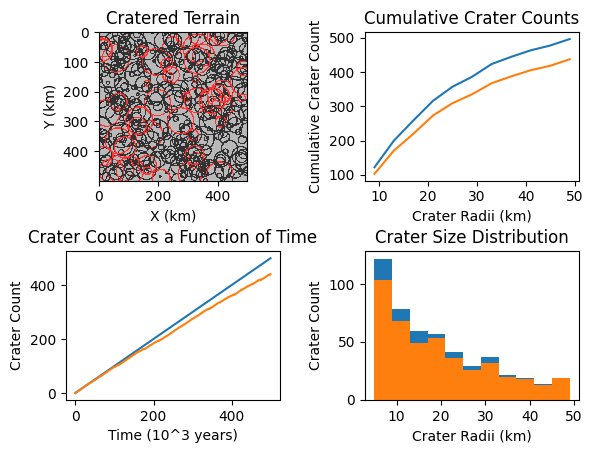

In [176]:
%matplotlib inline

import math
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

class CraterSim:

    def __init__(self, terrainLength, minCraterRadius, maxCraterRadius, surfaceValue, craterValue):
        self.terrainLength = terrainLength
        self.minCraterRadius = minCraterRadius
        self.maxCraterRadius = maxCraterRadius
        self.surfaceValue = surfaceValue
        self.craterValue = craterValue

        self.data = np.full((terrainLength, terrainLength, 3), [surfaceValue, surfaceValue, surfaceValue], dtype=np.uint8)

    def crater(self, x, y, radius, hidesOthers, outlineMode=False):
        step = math.acos(1 - 1/radius)
        t = 0.0
        while t < 360.0:
            target = range(int(radius))
            if outlineMode:
                target = range(int(radius) - 4, int(radius))
            for r in target:
                xPoint = int(x + (r * math.cos(math.radians(t))))
                yPoint = int(y + (r * math.sin(math.radians(t))))
                if xPoint > -1 and xPoint < self.terrainLength and yPoint > -1 and yPoint < self.terrainLength:
                    # percent = r/radius
                    v = self.craterValue
                    rc = v

                    if hidesOthers:
                        rc = 255

                    if not outlineMode:
                        if r > radius - 4:
                            v = 0
                            rc = 0

                    self.data[xPoint, yPoint] = [rc, v, v]
            t += step

    def isBVisible(self, A, B):
        if A[2] > B[2]:
            dis = math.sqrt((B[0] - A[0])**2 + (B[1] - A[1])**2)
            return dis > (1 - 0.7) * A[2]

        return True

    def generateCraters(self, steps):
        self.craterList = []
        self.visCraterList = []

        self.timeSteps = []
        self.timeCounts = []
        self.visCounts = []
        
        for i in range(steps):
            xPos = random.uniform(0.0, self.terrainLength)
            yPos = random.uniform(0.0, self.terrainLength)
            radius = math.exp(random.uniform(math.log(self.minCraterRadius), math.log(self.maxCraterRadius)))
            nextCrater =[xPos, yPos, radius]
            hidesOthers = False
            queueRemove = []
            for c in self.visCraterList:
                if not self.isBVisible(nextCrater, c):
                    hidesOthers = True
                    queueRemove.append(c)

            for c in queueRemove:
                self.visCraterList.remove(c)
                
            self.craterList.append(nextCrater)
            self.visCraterList.append(nextCrater)
            sim.crater(xPos, yPos, radius, hidesOthers, outlineMode=True)

            self.timeSteps.append(i)
            self.timeCounts.append(i + 1)
            self.visCounts.append(len(self.visCraterList))

    def binCraters(self, binStep):
        self.bins = []
        self.cCounts = []
        self.vCCounts = []

        size = self.minCraterRadius
        binIndex = 0
        while size < self.maxCraterRadius:
            self.bins.append(size)
            self.cCounts.append(0)
            self.vCCounts.append(0)

            for c in self.craterList:
                if c[2] <= size:
                    self.cCounts[binIndex] += 1
            
            for c in self.visCraterList:
                if c[2] <= size:
                    self.vCCounts[binIndex] += 1
            
            size += binStep
            binIndex += 1

        radii = []
        for c in self.craterList:
            radii.append(c[2])

        vRadii = []
        for c in self.visCraterList:
            vRadii.append(c[2])
        
        self.histCounts = np.histogram(radii, bins=self.bins)[0]
        self.vHistCounts = np.histogram(vRadii, bins=self.bins)[0]

    def drawVisuals(self):
        fig, ax = plt.subplots(2, 2)
        fig.tight_layout(pad=3.0)

        ax[0, 0].set_title("Cratered Terrain")
        ax[0, 0].set_xlabel("X (km)")
        ax[0, 0].set_ylabel("Y (km)")
        ax[0, 0].imshow(self.data, interpolation='nearest')

        ax[0, 1].set_title("Cumulative Crater Counts")
        ax[0, 1].set_xlabel("Crater Radii (km)")
        ax[0, 1].set_ylabel("Cumulative Crater Count")
        ax[0, 1].plot(self.bins[1:], self.cCounts[1:])
        ax[0, 1].plot(self.bins[1:], self.vCCounts[1:])

        ax[1, 0].set_title("Crater Count as a Function of Time")
        ax[1, 0].set_xlabel("Time (10^3 years)")
        ax[1, 0].set_ylabel("Crater Count")
        ax[1, 0].plot(self.timeSteps, self.timeCounts)
        ax[1, 0].plot(self.timeSteps, self.visCounts)

        ax[1, 1].set_title("Crater Size Distribution")
        ax[1, 1].set_xlabel("Crater Radii (km)")
        ax[1, 1].set_ylabel("Crater Count")
        ax[1, 1].hist(self.bins[:-1], self.bins, weights=self.histCounts)
        ax[1, 1].hist(self.bins[:-1], self.bins, weights=self.vHistCounts)


        fig.show()

sim = CraterSim(terrainLength=500, minCraterRadius=5, maxCraterRadius=50, surfaceValue=185, craterValue=50)
sim.generateCraters(500)
sim.binCraters(4)

sim.drawVisuals()